In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot')
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

---
#The K-means Algorithm & SKlearn
---

##Let's start by generating some artificial blobs of data:
---

In [2]:
m = 100
N = 2
num_blobs = 8

#the y below  contains the 'cluster' information - i.e. which cluster and given data point belongs to
X, y = make_blobs(n_samples = m, n_features = N, centers=num_blobs, cluster_std=0.5, random_state=2)

In [3]:
#help(make_blobs)

### As usual, we first *plot* the data to get a feeling of what we're dealing with
###Without knowing ahead of time you could argue that there are 3 clusters present

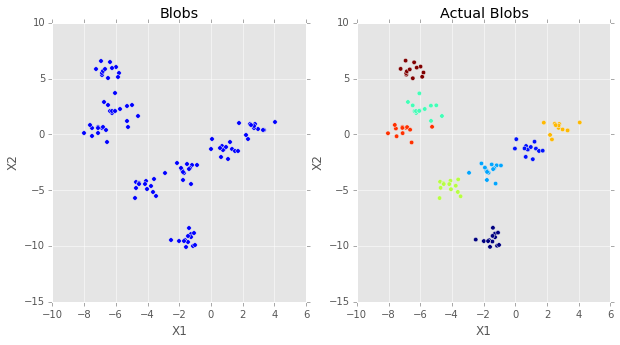

In [4]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(121)
ax.set_title("Blobs")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.scatter(X[:,0], X[:,1], marker = 'o')

ax1 = plt.subplot(122)
ax1.set_title("Actual Blobs")
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.scatter(X[:,0], X[:,1], marker = 'o', c=y)

##Normally, you would not know about 'y'
##You now use K-means to try and recover this infomation from the data itself

## Check out the docs on sklearn's [K-means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [5]:
#help(KMeans)

##### class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances=True, verbose=0, random_state=None, copy_x=True, n_jobs=1)

Y hat:  [1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0]
Centroid locations: 
[[-6.44946672  2.78898979]
 [-0.74258008 -3.65489119]]
Inertia:  1309.09156524
[0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1]


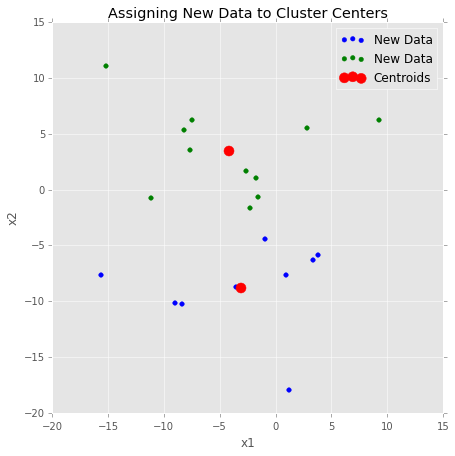

In [9]:
#Illustrates the basic usage of K-means
#K sets the number of clusters you would like to try to model your data with
K = 2

#The call to K-means
kmeans1 = KMeans(n_clusters=K, max_iter = 10000, n_init = 100, tol = 1e-6, n_jobs = 1, \
                 random_state=8, verbose=False)

#A call to K-means fit returns the cluster number that each data point belongs to
y_hat = kmeans1.fit(X).labels_

#Intertia is the same thing as cost, this is J, the cost function
inertia = kmeans1.inertia_

#Centroids holds the coordinates of the cluster centers
centroids = kmeans1.cluster_centers_

#Check out the results of printing this stuff out
print "Y hat: ", y_hat
print "Centroid locations: \n", centroids
print "Inertia: ", inertia


#get some new blob data
m_new = 20
N_new = 2
num_blobs_new = 15

#the y below  contains the 'cluster' information - i.e. which cluster and given data point belongs to
X_new, y_new = make_blobs(n_samples = m_new, n_features = N_new, centers=num_blobs_new, 
                          cluster_std=5.0, random_state=2)

#use the K-means to assign the new data to the 2 centroids
y_new_hat = kmeans1.fit(X_new).labels_
print y_new_hat

#assign the centroid location to 'centroids'
centroids = kmeans1.cluster_centers_

fig = plt.figure(figsize = (7, 7))
ax = plt.subplot(111)
ax.scatter(X_new[y_new_hat==1,0], X_new[y_new_hat==1,1], color='blue', marker='o', label='New Data')
ax.scatter(X_new[y_new_hat==0,0], X_new[y_new_hat==0,1], color='green', marker='o', label='New Data')
ax.scatter(centroids[:,0], centroids[:,1], color='red', marker='o', s=100, label='Centroids')
ax.legend(loc='best')
ax.set_title("Assigning New Data to Cluster Centers")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

### Now the label assignments should be quite similar to `Y`, up to a different ordering of the colors:

Y hat:  [1 2 2 1 0 6 3 3 3 4 5 0 4 3 7 4 6 7 1 3 7 7 0 4 7 3 1 5 5 7 1 1 1 4 6 1 6
 5 1 6 3 2 5 6 7 0 5 2 4 5 6 2 6 3 2 4 5 7 0 1 5 6 7 6 3 4 4 0 4 4 6 4 1 2
 2 0 6 1 0 5 7 2 5 0 3 4 0 7 0 0 2 2 7 5 3 6 2 7 1 7]
Centroid locations: 
[[-6.51258907  5.75486323]
 [ 0.8718856  -1.30107988]
 [-4.17328961 -4.70045898]
 [-7.17601714  0.32780492]
 [-1.50822712 -9.38015231]
 [ 2.76659904  0.57502674]
 [-1.66383216 -3.2228415 ]
 [-5.82450079  2.18060067]]
Inertia:  50.451470934


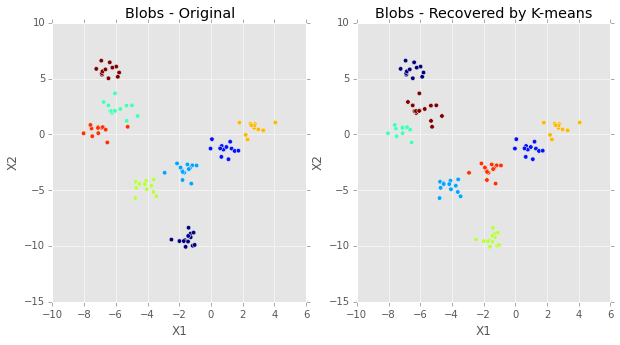

In [10]:
K = 8
kmeans1 = KMeans(n_clusters=K, max_iter = 10000, n_init = 100, tol = 1e-6, n_jobs = 1, \
                 random_state=8, verbose=False)
y_hat = kmeans1.fit(X).labels_
inertia = kmeans1.inertia_
centroids = kmeans1.cluster_centers_

print "Y hat: ", y_hat
print "Centroid locations: \n", centroids
print "Inertia: ", inertia


fig = plt.figure(figsize=(10,5))

ax = plt.subplot(121)
ax.set_title("Blobs - Original")
ax.set_xlabel("X1")
ax.set_ylabel("X2")

#color this plot using the known blob information held in 'y'
ax.scatter(X[:,0], X[:,1], marker = 'o', c=y)

ax1 = plt.subplot(122)
ax1.set_title("Blobs - Recovered by K-means")
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")

#color this plot using the predicted cluster information held in 'y_hat'
ax1.scatter(X[:,0], X[:,1], marker = 'o', c=y_hat)

##Often, you are more interested in the centroids themselves rather than which data points are assigned to a particular centroid or cluster
##The centroids can be seen as *representatives* of their respective cluster

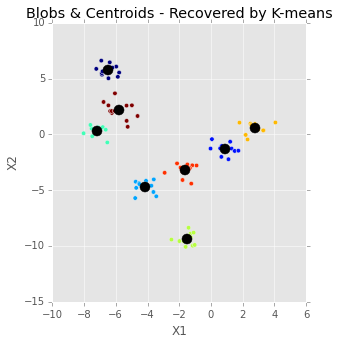

In [11]:
fig = plt.figure(figsize=(10,5))

ax = plt.subplot(121)
ax.set_title("Blobs & Centroids - Recovered by K-means")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.scatter(X[:,0], X[:,1], marker = 'o', c=y_hat)

ax.scatter(centroids[:,0], centroids[:,1], s=100, color = 'black')

## Let's try to find an ideal value of K using the elbow method

In [12]:
inertia_list = []
k_list = []
for k in xrange(1, 21):
    
    # create a new KMeans object for each value of k
    kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 100, tol = 1e-6, n_jobs = -1, \
                 random_state=8, verbose=False)
    kmeans.fit(X)
    
    print "k is {:d}, inertia is  {:5.2f}".format(k, kmeans.inertia_)
    
    # inertia: Sum of distances of samples to their closest cluster center
    inertia_list.append(kmeans.inertia_) 
    k_list.append(k)

k is 1, inertia is  3036.18
k is 2, inertia is  1309.09
k is 3, inertia is  606.10
k is 4, inertia is  336.43
k is 5, inertia is  178.60
k is 6, inertia is  125.68
k is 7, inertia is  81.31
k is 8, inertia is  50.45
k is 9, inertia is  44.46
k is 10, inertia is  41.83
k is 11, inertia is  39.52
k is 12, inertia is  37.06
k is 13, inertia is  35.04
k is 14, inertia is  32.90
k is 15, inertia is  30.74
k is 16, inertia is  28.47
k is 17, inertia is  26.55
k is 18, inertia is  24.52
k is 19, inertia is  22.91
k is 20, inertia is  21.56


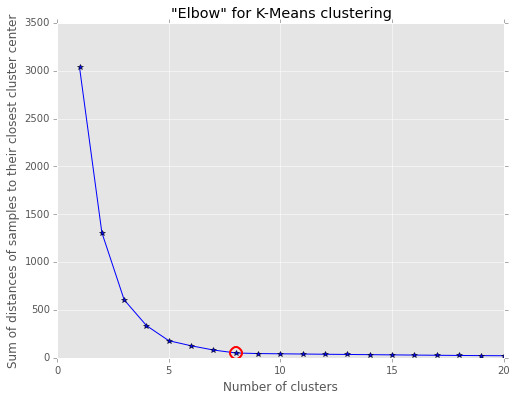

In [14]:
ideal_k = num_blobs - 1 # (we know in advance that this is the ideal value for k)

# plot elbow curve
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(k_list, inertia_list, 'b*-')

# highlight the ideal k
ax.plot(k_list[ideal_k], inertia_list[ideal_k], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')

#plt.grid(True)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Sum of distances of samples to their closest cluster center')
ax.set_title('"Elbow" for K-Means clustering')  

##Now consider the case of 10-dimensional data!

In [15]:
m = 100
#N is TEN!!
N = 10
num_blobs = 8



#MAKE 10 DIMENSIONAL BLOBS
#the y below  contains the 'cluster' information - i.e. which cluster and given data point belongs to
X, y = make_blobs(n_samples = m, n_features = N, centers=num_blobs, cluster_std=2.0, random_state=2)

---
##Make sure you really understand 10 dimensional data
###Look at it via a data frame
---

In [16]:
cols = ['dim1','dim2','dim3','dim4','dim5','dim6','dim7','dim8','dim9','dim10']
df = pd.DataFrame(X, columns = cols)
df.columns.name = 'N'
df.index.name = 'm'
df.head(5)

N,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10
m,,,,,,,,,,
0,-3.546369,-8.615290,0.385077,3.877038,2.078021,-2.511924,-7.345535,1.218590,-4.657006,-5.783924
1,1.604715,-8.960815,6.612169,-1.499369,-2.005097,-4.627661,7.431709,3.653279,-8.451360,4.678126
2,-2.464382,-3.612227,3.406556,1.019931,0.069413,-1.790065,6.860821,4.692639,-6.260313,1.077495
3,0.369304,-6.985050,0.185465,-4.062589,1.141827,-0.957532,-6.831038,3.087196,-3.243174,-3.530904
4,9.803638,1.535417,9.356441,-3.981853,0.293099,-2.628698,-2.990117,2.045438,1.919426,8.915618


In [17]:
df.tail(5)

N,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10
m,,,,,,,,,,
95,1.600120,-9.160064,0.783737,-8.816059,-5.884508,2.323244,-4.307352,-7.901861,-6.422693,-2.868847
96,-0.408657,-7.038506,7.782504,-1.241325,1.142407,-1.533251,4.276052,1.611399,-7.395897,4.514074
97,3.975842,4.528906,4.886857,-6.496756,-4.628234,-2.482206,-2.189439,-9.100076,8.842795,-1.612786
98,8.210730,-0.508855,9.417754,-2.991465,1.285011,0.896284,-4.005903,7.758243,3.865864,6.261445
99,6.839785,1.741508,4.238712,-6.454630,-2.631213,0.553188,-4.459877,-7.424664,9.070252,-0.002181


---
#Search for the ideal value of K
---

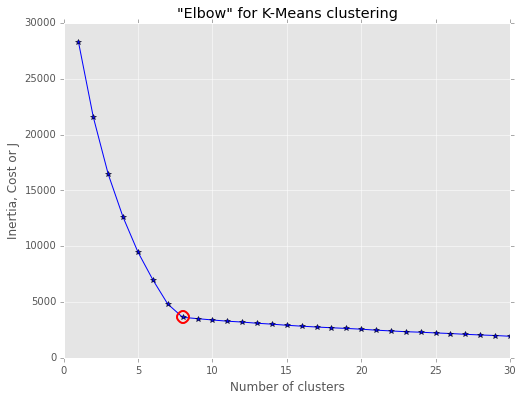

In [18]:
inertia_list = []
k_list = []

for k in xrange(1, 31):
    
    # create a new KMeans object for each value of k
    kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 100, tol = 1e-6, n_jobs = -1, \
                 random_state=8, verbose=False)
    kmeans.fit(X)
    
    #print "k is {:d}, inertia is  {:5.2f}".format(k, kmeans.inertia_)
    
    # inertia: Sum of distances of samples to their closest cluster center
    inertia_list.append(kmeans.inertia_) 
    k_list.append(k)
    
ideal_k = num_blobs - 1 # (we know in advance that this is the ideal value for k)

# plot elbow curve
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(k_list, inertia_list, 'b*-')

# highlight the ideal k
ax.plot(k_list[ideal_k], inertia_list[ideal_k], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')

#plt.grid(True)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia, Cost or J')
ax.set_title('"Elbow" for K-Means clustering')  

In [19]:
def plot(X1, X2, plot_location, the_title, the_ydim):
    '''A basic plotting routine for plotting a point'''
    
    ax = plt.subplot(plot_location)
    ax.set_title(the_title)
    ax.set_xlabel("X0")
    ax.set_ylabel(the_ydim)
    ax.scatter(X1, X2, marker = 'o', c=y)

---
##Visualizing this data
---

---
##Plot one dimensional vs all the others???!!!
---

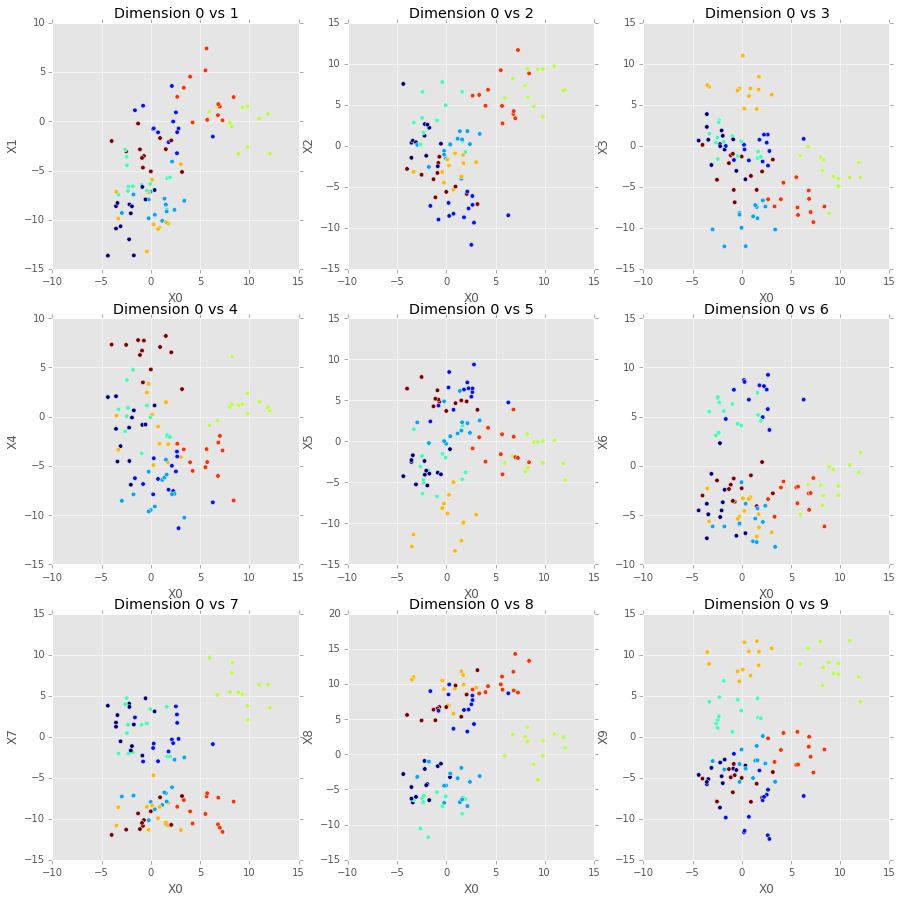

In [21]:
fig = plt.figure(figsize=(15, 15))

#Plot dimension 0 against all other 9 dimensions!
for i in xrange(1, N):
    l = '33' + str(i)
    the_title = "Dimension 0 vs {:s}".format(str(i))
    the_ydim = "X{:s}".format(str(i))
    
    #make the plot
    plot(X[:, 0], X[: ,i], l, the_title, the_ydim)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2) 

---
#Be sure that you understand the difference between K-means and PCA
##PCA is dimensional reduction - reducing N, the number of features
##K-means is clustering - potentially reducing m, the number of examples
##K-means has NOTHING to do with altering the dimensionality of your data
---

---
#Let's combine the 2, and use PCA to help us visualize the data!!
---

---
##So how good was that 10-dimensional clustering
##Let's reduce our 10-D data to 2-D and see what it looks like
---

In [24]:
#find 8 clusters, let's assume we got a good indication K should be 8
kmeans = KMeans(n_clusters = 8, max_iter = 1000, n_init = 100, tol = 1e-6, n_jobs = -1, \
                 random_state=8, verbose=False)
kmeans.fit(X)

#Use the cluster centroids to fit PCA, with 2 components, x1, and x2, because we want to do simple plots
centroids = kmeans.cluster_centers_
myPCA = PCA(n_components = 2).fit(centroids)

#transform the centroids down to 2D
new_centroids = myPCA.transform(centroids)

#transform the data down to 2D
new_data = myPCA.transform(X)

print new_data.shape

(100, 2)


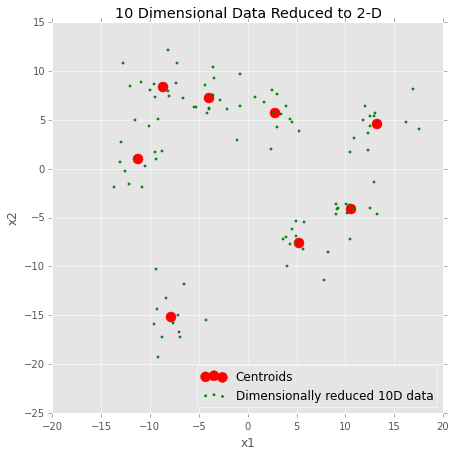

In [23]:
#and now plot in 2-D

fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111)
ax.scatter(new_centroids[:,0], new_centroids[:,1], marker='o', color='red', s=100, label='Centroids')
ax.scatter(new_data[:,0], new_data[:,1], marker='.', color='green', label='Dimensionally reduced 10D data')
ax.set_title('10 Dimensional Data Reduced to 2-D')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='lower right')

---
#Have I convinced you that these 2 algorithms do work?? K-means can find high-dimensional cluster centers
#PCA can effectively reduce the dimensionality of your data
---